# Crop Yield Prediction - ML Baseline

We use WOFOST crop growth indicators, weather variables, geographic information, soil data and remote sensing indicators to predict the yield.

## Google Colab Notes

**To run the script in Google Colab environment**
1. Download the data directory and save it somewhere convenient.
2. Open the notebook using Google Colaboratory.
3. Create a copy of the notebook for yourself.
4. Click connect on the right hand side of the bar below menu items. When you are connected to a machine, you will see a green tick mark and bars showing RAM and disk.
5. Click the folder icon on the left sidebar and click upload. Upload the data files you downloaded. Click *Ok* when you see a warning saying the files will be deleted after the session is disconnected.
6. Use *Runtime* -> *Run before* option to run all cells before **Set Configuration**.
7. Run the remaining cells except **Python Script Main**. The configuration subsection allows you to change configuration and rerun experiments.


## Install Spark

Install PySpark package. Package installation is required only in Google Colab.

In [ ]:
!pip install pyspark > /dev/null
!sudo apt update > /dev/null
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!pip install joblibspark > /dev/null
!pip install scikit-optimize >/dev/null

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

import pyspark
from pyspark import SparkContext
from pyspark import SparkConf
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext

SparkContext.setSystemProperty('spark.executor.memory', '12g')
SparkContext.setSystemProperty('spark.driver.memory', '6g')
spark = SparkSession.builder.master("local[*]").getOrCreate()
spark.conf.set("spark.sql.execution.arrow.pyspark.enabled", "true")

sc = SparkContext.getOrCreate()
sqlContext = SQLContext(sc)

## Install Optimized cypml package

Install cypml package from the test PyPi site. Version 1.2.* have optimized models.


In [ ]:
! pip install cypml==1.2.6

Looking in indexes: https://test.pypi.org/simple/
     |████████████████████████████████| 71kB 3.5MB/s 


## Run Workflow

### Set Configuration



Test Utility Functions BEGIN


 Test Date Format
+---+--------+-----+
| ID|    DATE|FYEAR|
+---+--------+-----+
|  1|19940102| 1994|
|  2|15831224| 1583|
+---+--------+-----+

+---+---------+-----+
| ID|     DATE|FYEAR|
+---+---------+-----+
|  1| 14341224| 1434|
|  2| 12345678| null|
|  3|123-12-24| null|
+---+---------+-----+

+---+---------+-----+-----+
| ID|     DATE|FYEAR|MONTH|
+---+---------+-----+-----+
|  1| 14341224| 1434|   12|
|  2| 12345678| null| null|
|  3|123-12-24| null| null|
+---+---------+-----+-----+

+---+---------+-----+-----+----+
| ID|     DATE|FYEAR|MONTH| DAY|
+---+---------+-----+-----+----+
|  1| 14341224| 1434|   12|  24|
|  2| 12345678| null| null|null|
|  3|123-12-24| null| null|null|
+---+---------+-----+-----+----+

+---+---------+-----+-----+----+-----+
| ID|     DATE|FYEAR|MONTH| DAY|DEKAD|
+---+---------+-----+-----+----+-----+
|  1| 14341224| 1434|   12|  24|   36|
|  2| 12345678| null| null|null| null|
|  3|123-12-24| null| null|null| null|
+---+

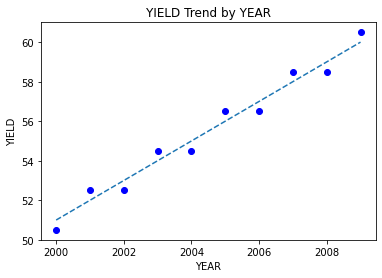


 Test plotTrueVSPredicted


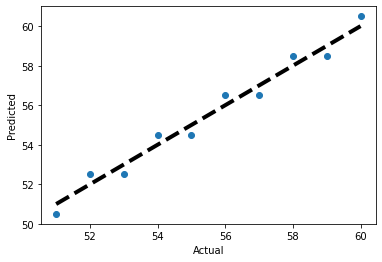


Test Utility Functions END

##################
# Configuration  #
##################

Current ML Baseline Configuration
--------------------------------
Crop name: sugarbeet
Crop ID: 6
Crop growing season crosses calendar year boundary: N
Country code (e.g. NL): NL
NUTS level for yield prediction: NUTS2
Input data sources: WOFOST, METEO_DAILY, SOIL, YIELD, REMOTE_SENSING, GAES, CROP_AREA
Remove data or regions with duplicate or missing values: Y
Estimate and use yield trend: Y
Predict yield residuals instead of full yield: N
Find optimal trend window: N
List of trend window lengths (number of years): 5, 7, 10
Use centroid coordinates and distance to coast: N
Use remote sensing data (FAPAR): Y
Use agro-environmental zones data: Y
Use per region per year crop calendar: Y
Predict yield early in the season: N
Early season end dekad relative to harvest: 0
Path to all input data. Default is current directory.: .
Path to all output files. Default is current directory.: .
Use feature design v

In [ ]:
from cypml.common import globals
from cypml.common.config import CYPConfiguration
from cypml.tests.test_util import TestUtil
from cypml.common.util import getLogFilename

cyp_config = CYPConfiguration()
run_tests = globals.run_tests

if (run_tests):
  test_util = TestUtil(spark)
  test_util.runAllTests()

my_config = {
      'crop_name' : 'sugarbeet',
      'season_crosses_calendar_year' : 'N',
      'country_code' : 'NL',
      'data_sources' : [ 'WOFOST', 'METEO_DAILY', 'SOIL', 'YIELD'],
      'clean_data' : 'Y',
      'data_path' : '.',
      'output_path' : '.',
      'nuts_level' : 'NUTS2',
      'use_yield_trend' : 'Y',
      'predict_yield_residuals' : 'N',
      'trend_windows' : [5, 7, 10],
      'find_optimal_trend_window' : 'N',
      'use_centroids' : 'N',
      'use_remote_sensing' : 'Y',
      'use_gaes' : 'Y',
      'use_per_year_crop_calendar' : 'Y',
      'early_season_prediction' : 'N',
      'early_season_end_dekad' : 0,
      'use_features_v2' : 'Y',
      'save_features' : 'N',
      'use_saved_features' : 'N',
      'use_sample_weights' : 'N',
      'retrain_per_test_year' : 'Y',
      'save_predictions' : 'N',
      'use_saved_predictions' : 'N',
      'compare_with_mcyfs' : 'Y',
      'debug_level' : 2,
}

cyp_config.updateConfiguration(my_config)
crop = cyp_config.getCropName()
country = cyp_config.getCountryCode()
nuts_level = cyp_config.getNUTSLevel()
debug_level = cyp_config.getDebugLevel()
use_saved_predictions = cyp_config.useSavedPredictions()
use_saved_features = cyp_config.useSavedFeatures()
use_yield_trend = cyp_config.useYieldTrend()
early_season_prediction = cyp_config.earlySeasonPrediction()
early_season_end = cyp_config.getEarlySeasonEndDekad()

print('##################')
print('# Configuration  #')
print('##################')
output_path = cyp_config.getOutputPath()
log_file = getLogFilename(crop, use_yield_trend,
                            early_season_prediction, early_season_end,
                            country)
log_fh = open(output_path + '/' + log_file, 'w+')
cyp_config.printConfig(log_fh)

### Load and Preprocess Data


In [ ]:
from cypml.workflow.data_loading import CYPDataLoader
from cypml.workflow.data_preprocessing import CYPDataPreprocessor
from cypml.tests.test_data_loading import TestDataLoader
from cypml.tests.test_data_preprocessing import TestDataPreprocessor
from cypml.run_workflow.run_data_preprocessing import preprocessData

if ((not use_saved_predictions) and
    (not use_saved_features)):

  print('#################')
  print('# Data Loading  #')
  print('#################')

  if (run_tests):
    test_loader = TestDataLoader(spark)
    test_loader.runAllTests()

  cyp_loader = CYPDataLoader(spark, cyp_config)
  data_dfs = cyp_loader.loadAllData()

  print('#######################')
  print('# Data Preprocessing  #')
  print('#######################')

  if (run_tests):
    test_preprocessor = TestDataPreprocessor(spark)
    test_preprocessor.runAllTests()

  cyp_preprocessor = CYPDataPreprocessor(spark, cyp_config)
  data_dfs = preprocessData(cyp_config, cyp_preprocessor, data_dfs)

#################
# Data Loading  #
#################

Test Data Loader BEGIN


Test loadData, loadAllData
Data file name "./SOIL_NUTS2_NL.csv"
+--------+------+------+------+--------+
|IDREGION| SM_WP| SM_FC|SM_SAT|   DEPTH|
+--------+------+------+------+--------+
|    NL42|0.0958|0.2512|0.4096| 95.7094|
|    NL23|0.1522|0.3122|0.4065|125.4294|
|    NL34|0.1524|0.3106|0.4097|120.7511|
|    NL11|  0.18|0.3961|0.4919|105.8296|
|    NL41|0.1383|0.2862|0.4058|109.7021|
+--------+------+------+------+--------+
only showing top 5 rows

Data file name "./SOIL_NUTS2_NL.csv"
Loaded data: SOIL


+--------+------+------+------+--------+
|IDREGION| SM_WP| SM_FC|SM_SAT|   DEPTH|
+--------+------+------+------+--------+
|    NL42|0.0958|0.2512|0.4096| 95.7094|
|    NL23|0.1522|0.3122|0.4065|125.4294|
|    NL34|0.1524|0.3106|0.4097|120.7511|
|    NL11|  0.18|0.3961|0.4919|105.8296|
|    NL41|0.1383|0.2862|0.4058|109.7021|
+--------+------+------+------+--------+
only showing top 5 rows


Test Data 

### Split Data into Training and Test Sets

In [ ]:
from cypml.tests.test_train_test_split import TestCustomTrainTestSplit
from cypml.run_workflow.run_train_test_split import splitDataIntoTrainingTestSets

if ((not use_saved_predictions) and
    (not use_saved_features)):

  print('###########################')
  print('# Training and Test Split #')
  print('###########################')

  if (run_tests):
    yield_df = data_dfs['YIELD']
    test_custom = TestCustomTrainTestSplit(yield_df)
    test_custom.runAllTests()

  prep_train_test_dfs, test_years = splitDataIntoTrainingTestSets(cyp_config, data_dfs, log_fh)

###########################
# Training and Test Split #
###########################

Test Custom Train, Test Splitter BEGIN


Test customTrainTestSplit

Custom training, test split using yield trend
---------------------------------------------
Estimated size of test data 60.0
Data Size: 240 60
Test years: [2014, 2015, 2016, 2017, 2018]

custom training, test split without yield trend
------------------------------------------------
Estimated size of test data 60.0
Data Size: 240 60
Test years: [1998, 2003, 2008, 2013, 2018]

Test customKFoldValidationSplit

Custom sliding validation train, test splits
----------------------------------------------
Validation set 1 training years: 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008
Validation set 1 test years: 2009
Validation set 2 training years: 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009
Validation set 2 test years: 2010
Validation set 3 training

### Summarize Data

In [ ]:
from cypml.tests.test_data_summary import TestDataSummarizer
from cypml.workflow.data_summary import CYPDataSummarizer
from cypml.run_workflow.run_data_summary import summarizeData

if ((not use_saved_predictions) and
    (not use_saved_features)):

  print('#################')
  print('# Data Summary  #')
  print('#################')

  if (run_tests):
    test_summarizer = TestDataSummarizer(spark)
    test_summarizer.runAllTests()

  cyp_summarizer = CYPDataSummarizer(cyp_config)
  summary_dfs = summarizeData(cyp_config, cyp_summarizer, prep_train_test_dfs)

#################
# Data Summary  #
#################

Test Data Summarizer BEGIN

WOFOST Crop Calendar Summary using DVS
-----------------------------
+--------+-------------+---------+----------+----------+-------------------+---------------------+
|IDREGION|CAMPAIGN_YEAR|START_DVS|START_DVS1|START_DVS2|CALENDAR_END_SEASON|CAMPAIGN_EARLY_SEASON|
+--------+-------------+---------+----------+----------+-------------------+---------------------+
|    NL11|         1980|       23|        29|        34|                 25|                   35|
|    NL11|         1979|       23|        26|        33|                 24|                   34|
+--------+-------------+---------+----------+----------+-------------------+---------------------+

WOFOST indicators summary
--------------------------
+--------+-----------+------------+--------+
|IDREGION|max(POT_YB)|max(WLIM_YB)|avg(RSM)|
+--------+-----------+------------+--------+
|    NL11|      200.0|       150.0|    7.87|
+--------+----------

### Create Features

In [ ]:
from cypml.workflow.feature_design import CYPFeaturizer
from cypml.run_workflow.run_feature_design import createFeatures
from cypml.tests.test_yield_trend import TestYieldTrendEstimator
from cypml.workflow.yield_trend import CYPYieldTrendEstimator
from cypml.run_workflow.run_trend_feature_design import createYieldTrendFeatures
from cypml.run_workflow.run_trend_feature_design import addFeaturesFromPreviousYears

if ((not use_saved_predictions) and
    (not use_saved_features)):

  print('###################')
  print('# Feature Design  #')
  print('###################')

  # WOFOST, Meteo and Remote Sensing Features
  cyp_featurizer = CYPFeaturizer(cyp_config)
  pd_feature_dfs = createFeatures(cyp_config, cyp_featurizer,
                                  prep_train_test_dfs, summary_dfs, log_fh)

  # trend features
  join_cols = ['IDREGION', 'FYEAR']
  if (use_yield_trend):
    yield_train_df = prep_train_test_dfs['YIELD'][0]
    yield_test_df = prep_train_test_dfs['YIELD'][1]

    # Trend features from feature data
    use_features_v2 = cyp_config.useFeaturesV2()
    if (use_features_v2):
      pd_feature_dfs = addFeaturesFromPreviousYears(cyp_config, pd_feature_dfs,
                                                    1, test_years, join_cols)

    if (run_tests):
      test_yield_trend = TestYieldTrendEstimator(yield_train_df)
      test_yield_trend.runAllTests()

    # Trend features from label data
    cyp_trend_est = CYPYieldTrendEstimator(cyp_config)
    pd_yield_train_ft, pd_yield_test_ft = createYieldTrendFeatures(cyp_config, cyp_trend_est,
                                                                   yield_train_df, yield_test_df,
                                                                   test_years)
    pd_feature_dfs['YIELD_TREND'] = [pd_yield_train_ft, pd_yield_test_ft]

###################
# Feature Design  #
###################

 WOFOST Aggregate Features: Training
  IDREGION  FYEAR  maxWLIM_YBp2  ...  maxWLAIp4  avgRSMp2  avgRSMp4
0     NL34   1987       4016.67  ...       5.66     90.20     70.26
1     NL42   1995       2615.32  ...       3.68     89.34     29.10
2     NL12   1999       4411.05  ...       5.82     94.00     64.00
3     NL13   2006       3007.10  ...       4.16     90.38     65.28
4     NL34   2000       1356.84  ...       4.60     94.75     69.73

[5 rows x 11 columns]

 WOFOST Aggregate Features: Test
  IDREGION  FYEAR  maxWLIM_YBp2  ...  maxWLAIp4  avgRSMp2  avgRSMp4
0     NL13   2016       2175.01  ...       4.36     95.82     67.05
1     NL21   2018       1038.62  ...       3.10     91.10     35.68
2     NL32   2014       2763.33  ...       4.26     93.49     64.05
3     NL42   2015       3801.85  ...       4.16     84.48     58.02
4     NL33   2012       2129.41  ...       4.85    103.96     77.55

[5 rows x 11 columns]

 WOFO

/usr/local/lib/python3.7/dist-packages/cypml/workflow/yield_trend.py:144: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pd_iter_preds['YTRUE' + str(iter)] = pd_yield_ft_df['YIELD-' + str(iter)]
/usr/local/lib/python3.7/dist-packages/cypml/workflow/yield_trend.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pd_iter_preds['YPRED' + str(iter)] = predicted_trend
/usr/local/lib/python3.7/dist-packages/cypml/workflow/yield_trend.py:185: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

  IDREGION  FYEAR  OPT_TW  PREDICTED     ACTUAL
0     NL11   2011       7      75.64  75.800003

 Fixed Trend Window prediction for region 2
---------------------------------------------------
  IDREGION  FYEAR  YEAR-5  YEAR-4  ...  YIELD-2    YIELD-1  PREDICTED     ACTUAL
0     NL12   2011    2006    2007  ...     75.5  75.800003      78.93  75.800003

[1 rows x 14 columns]

 Optimal Trend Window and prediction for region 2
---------------------------------------------------


/usr/local/lib/python3.7/dist-packages/cypml/workflow/yield_trend.py:144: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pd_iter_preds['YTRUE' + str(iter)] = pd_yield_ft_df['YIELD-' + str(iter)]
/usr/local/lib/python3.7/dist-packages/cypml/workflow/yield_trend.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pd_iter_preds['YPRED' + str(iter)] = predicted_trend
/usr/local/lib/python3.7/dist-packages/cypml/workflow/yield_trend.py:185: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

  IDREGION  FYEAR  OPT_TW  PREDICTED     ACTUAL
0     NL12   2011       7       78.7  75.800003

Yield trend estimation for all regions

Optimal Trend Windows


/usr/local/lib/python3.7/dist-packages/cypml/workflow/yield_trend.py:144: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pd_iter_preds['YTRUE' + str(iter)] = pd_yield_ft_df['YIELD-' + str(iter)]
/usr/local/lib/python3.7/dist-packages/cypml/workflow/yield_trend.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pd_iter_preds['YPRED' + str(iter)] = predicted_trend
/usr/local/lib/python3.7/dist-packages/cypml/workflow/yield_trend.py:185: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

  IDREGION  FYEAR  YEAR-5  YEAR-4  ...    YIELD-3    YIELD-2    YIELD-1  YIELD_TREND
0     NL42   1999    1994    1995  ...  54.000000  55.099998  52.000000        53.95
1     NL42   2000    1995    1996  ...  55.099998  52.000000  63.099998        61.30
2     NL42   2001    1996    1997  ...  52.000000  63.099998  62.200001        63.03
3     NL42   2002    1997    1998  ...  63.099998  62.200001  54.000000        60.40
4     NL42   2003    1998    1999  ...  62.200001  54.000000  56.599998        58.97

[5 rows x 13 columns]

Fixed Trend Window
  IDREGION  FYEAR  YEAR-5  YEAR-4  ...    YIELD-3    YIELD-2    YIELD-1  YIELD_TREND
0     NL42   1999    1994    1995  ...  54.000000  55.099998  52.000000        53.95
1     NL42   2000    1995    1996  ...  55.099998  52.000000  63.099998        61.30
2     NL42   2001    1996    1997  ...  52.000000  63.099998  62.200001        64.60
3     NL42   2002    1997    1998  ...  63.099998  62.200001  54.000000        59.68
4     NL42   2003    1

### Combine Features and Labels

In [ ]:
from cypml.run_workflow.combine_features import combineFeaturesLabels

if ((not use_saved_predictions) and
    (not use_saved_features)):

  join_cols = ['IDREGION', 'FYEAR']
  pd_train_df, pd_test_df = combineFeaturesLabels(cyp_config, sqlContext,
                                                  prep_train_test_dfs, pd_feature_dfs,
                                                  join_cols, log_fh)


Combine Features and Labels
---------------------------
Yield min year 1994

Data size after including SOIL data: 
Train 12 rows.
Test 12 rows.

Data size after including GAES data: 
Train 12 rows.
Test 12 rows.

Data size after including WOFOST features: 
Train 392 rows.
Test 84 rows.

Data size after including METEO features: 
Train 380 rows.
Test 84 rows.

Data size after including REMOTE_SENSING features: 
Train 143 rows.
Test 77 rows.

Data size after including CROP_AREA data: 
Train 143 rows.
Test 66 rows.

Data size after including yield trend features: 
Train 143 rows.
Test 66 rows.

Data size after including yield (label) data: 
Train 143 rows.
Test 66 rows.


All Features and labels: Training
   IDREGION  FYEAR  SM_WHC  ...    YIELD-1  YIELD_TREND      YIELD
51     NL11   1999    0.22  ...  47.000000        50.01  60.299999
42     NL11   2000    0.22  ...  60.299999        55.92  59.099998
49     NL11   2001    0.22  ...  59.099998        60.46  54.400002
48     NL11   2002 

### Apply Machine Learning using scikit learn


In [ ]:
from cypml.run_workflow.load_saved_features import loadSavedFeaturesLabels
from cypml.run_workflow.run_machine_learning import dropHighlyCorrelatedFeatures
from cypml.run_workflow.run_machine_learning import getMachineLearningPredictions
from cypml.run_workflow.run_machine_learning import saveMLPredictions

if ((not use_saved_predictions) and
    (use_saved_features)):
    pd_train_df, pd_test_df = loadSavedFeaturesLabels(cyp_config, spark)

if ((not use_saved_predictions)):
  print('\n###################################')
  print('# Machine Learning using sklearn  #')
  print('###################################')

  # drop mutually correlated features
  corr_threshold = cyp_config.getFeatureCorrelationThreshold()
  pd_train_df, pd_test_df = dropHighlyCorrelatedFeatures(cyp_config, pd_train_df, pd_test_df,
                                                         log_fh, corr_thresh=corr_threshold)

  pd_ml_predictions = getMachineLearningPredictions(cyp_config, pd_train_df, pd_test_df, log_fh)
  save_predictions = cyp_config.savePredictions()
  if (save_predictions):
    saveMLPredictions(cyp_config, sqlContext, pd_ml_predictions)


###################################
# Machine Learning using sklearn  #
###################################

Dropping highly correlated features
AVG_ELEV, STD_ELEV, AVG_SLOPE, maxWLIM_YBp2, maxTWCp2, maxWLIM_YBp4, avgRSMp2, avgRSMp4, avgPRECp1, avgPRECp3, avgPRECp5, avgPRECp5-1

Training and Evaluation
-------------------------

Training Data Size: 143 rows
X cols: 47, Y cols: 4
IDREGION  FYEAR  SM_WHC  STD_SLOPE  AVG_FIELD_SIZE  STD_FIELD_SIZE  IRRIG_AREA_ALL  IRRIG_AREA6  maxWLAIp2  maxWLIM_YSp4  maxTWCp4  maxWLAIp4  Z-RSMp1  Z+RSMp1  Z-RSMp2  Z+RSMp2  Z-RSMp3  Z+RSMp3  Z-RSMp4  Z+RSMp4  avgTAVGp0  avgPRECp0  avgCWBp0  avgTAVGp1  avgTAVGp2  avgCWBp2  avgRADp2  avgCWBp4  avgRADp4  Z-TMINp1  Z-PRECp1  Z+TMINp1  Z+PRECp1  Z-PRECp3  Z-TMAXp3  Z+PRECp3  Z+TMAXp3  Z-PRECp5  Z+PRECp5  Z-PRECp5-1  Z+PRECp5-1  avgFAPARp2  avgFAPARp4  CROP_AREA    YIELD-5    YIELD-4    YIELD-3    YIELD-2    YIELD-1  YIELD_TREND      YIELD
    NL11   1999    0.22   0.026759            28.0        24.84236     

### Compare Predictions with JRC Predictions

In [ ]:
from cypml.run_workflow.load_saved_predictions import loadSavedPredictions
from cypml.run_workflow.compare_with_mcyfs import comparePredictionsWithMCYFS

if (use_saved_predictions):
  pd_ml_predictions = loadSavedPredictions(cyp_config, spark)

compareWithMCYFS = cyp_config.compareWithMCYFS()
if (compareWithMCYFS):
  comparePredictionsWithMCYFS(sqlContext, cyp_config, pd_ml_predictions, log_fh)

log_fh.close()


##############
# Load Data  #
##############
Data file name "./AREA_FRACTIONS_NUTS2_NL.csv"
Data file name "./AREA_FRACTIONS_NUTS1_NL.csv"
Data file name "./WOFOST_NUTS2_NL.csv"
Data file name "./YIELD_NUTS0_NL.csv"
Data file name "./YIELD_PRED_MCYFS_NUTS0_NL.csv"

####################
# Preprocess Data  #
####################
NUTS0 Yield for NL before preprocessing
+------+--------+-----+-----+
|  CROP|IDREGION|FYEAR|YIELD|
+------+--------+-----+-----+
|potato|      NL| 1971| 37.3|
|potato|      NL| 1972| 37.5|
|potato|      NL| 1973| 36.8|
|potato|      NL| 1974| 38.4|
|potato|      NL| 1975| 33.1|
|potato|      NL| 1976| 29.8|
|potato|      NL| 1977| 33.8|
|potato|      NL| 1978| 38.6|
|potato|      NL| 1979| 37.8|
|potato|      NL| 1980| 36.3|
+------+--------+-----+-----+
only showing top 10 rows

NUTS0 Yield for NL after preprocessing
+--------+-----+-----+
|IDREGION|FYEAR|YIELD|
+--------+-----+-----+
|      NL| 2012| 78.9|
|      NL| 2013| 76.0|
|      NL| 2014| 87.4|
|      